In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tarfile
import librosa
import librosa.display
import pickle

tar = tarfile.open(name = "mini-genres.tar.bz", mode = 'r', fileobj = None, bufsize = 10240)
tar.extractall()
paths = [path for path in tar.getnames() if os.path.splitext(path)[1] == ".au"]
hop_length = 512
n_fft = 2084

In [25]:
# esta função pode ser utilizada com um for, para todos os arquivos do dataframe, cada iteração retorna um
# dicionário, no caso das figuras, foram escritas funções para exibir as variáveis retornadas, os arrays
# ficam armazenados em variáveis 

# esta função retorna apenas variáveis, para exibir os plots, existem outras funções que trabalham em cima
# das variáveis obtidas através desta
def audio_feature_extraction(sample, hop_length, n_fft): 
    
    audio, sr = librosa.load(sample, sr = 44100, duration = 10)
           
    stft = librosa.stft(audio, n_fft = n_fft, hop_length = hop_length)
    spectro = np.abs(stft)
    
    frequencia_db = librosa.amplitude_to_db(spectro)
    mfccs = librosa.feature.mfcc(audio, sr, n_mfcc = 13)
    chromograma = librosa.feature.chroma_stft(audio, sr = sr, n_fft = n_fft, hop_length = hop_length)
    spectral_centroid = librosa.feature.spectral_centroid(audio, sr, n_fft = n_fft, hop_length = hop_length)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(audio, sr = sr, n_fft = n_fft,
                                                        hop_length = hop_length)[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(audio, sr = sr, n_fft = n_fft,
                                                            hop_length = hop_length)[0]
    zero_crossings = librosa.zero_crossings(audio[0:100])
    
    # este 'label' funciona para o formato dos 'paths' dos dados disponíveis para este projeto
    return {'sr':sr, 'log_scale' : frequencia_db, 'mel_scale' : mfccs, 'chromo' : chromograma,
            'centroid' : spectral_centroid, 'rolloff' : spectral_rolloff, 'bandwidth' : spectral_bandwidth,
            'zero' : zero_crossings, 'label': sample.split('/')[1]}

# funções pra display das variáveis referentes aos plots
def display_chromo(chromograma, hop_length):
    librosa.display.specshow(chromograma, x_axis = 'tempo', y_axis = 'chroma',  hop_length = hop_length)
    plt.colorbar()
    plt.show()
    
def display_mfccs(mfccs, sr):
    librosa.display.specshow(mfccs, sr = sr, x_axis = 'tempo')
    plt.colorbar()
    plt.show()
    
def display_log_scale(frequencia_db, sr, hop_length):
    librosa.display.specshow(frequencia_db, sr = sr, hop_length = hop_length)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Frequência (Hz)')
    plt.colorbar()
    plt.title('Espectrograma')
    plt.set_cmap('inferno')
    plt.show()    

# esta função faz o 'unpacking' do dicionário, também exibe os plots, caso " 'show' == True "
def show_all(d, hop_length, show = True):
    arrs1 = d['centroid'], d['rolloff'], d['bandwidth'], d['zero'], d['label']
    arrs2 = d['chromo'], d['mel_scale'], d['log_scale'], d['centroid'], d['rolloff'], d['bandwidth'], \
                                                                           d['zero'], d['label']
    if show == True:
        display_chromo(d['chromo'], hop_length = hop_length)
        display_mfccs(d['mel_scale'], d['sr'])
        display_log_scale(d['log_scale'], d['sr'], hop_length = hop_length)
        return arrs1
    else:
        return arrs2

In [5]:
# criando dicionário contendo extrações de múltiplos áudios 

# passando o dataframe inteiro por este 'for', 'example_dict' seria preenchido com um dicionário para cada
# áudio, cada um destes dicionários possuiria como 'key', o nome do mesmo, em string, as 'keys' destes 
# dicionários que constituiriam 'example_dict', seriam strings explicando cada um de seus valores, estes que
# são as features que desejamos extrair ou variáveis que, se passadas por funções de 'display', exibem os 
# plots exigidos

# audio_features = {i : audio_feature_extraction(i, hop_length, n_fft) for i in paths}
# pickle.dump(audio_features, open('audio_features.pkl', 'wb'))

In [7]:
# 'audio_features' contém as 'features' de todos os áudios (50)
audio_features = pickle.load(open('audio_features.pkl', 'rb'))
files = [key for key in audio_features.keys()]

In [9]:
# 'audio_features' é um dicionário, cada 'key' deste é o 'path' de um áudio, seu 'valor' é um dicionário,
# organizado desta forma:

# exemplo:
audio_features[files[0]].keys()

dict_keys(['sr', 'log_scale', 'mel_scale', 'chromo', 'centroid', 'rolloff', 'bandwidth', 'zero', 'label'])

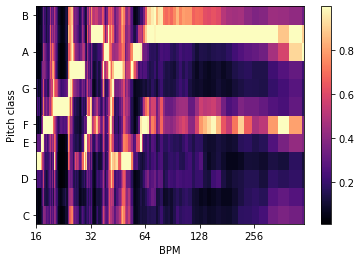

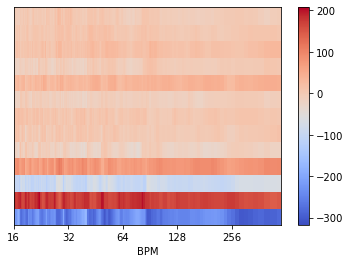

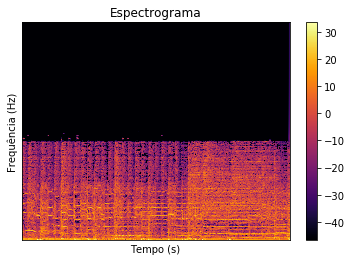

In [26]:
# exemplo 1:

# exibição de imagens
# as variáveis que sofrem 'unpacking' contém os arrays
centroid, rolloff, bandwidth, zero, label = show_all(audio_features[files[0]], hop_length, True)

In [20]:
print(centroid)
print(rolloff)
print(bandwidth)
print(zero)
print(label)

In [28]:
# exemplo 2:

# podemos 'acessar' features de múltiplos áudios de uma vez:
n = 0
for file in files:
    exec(f"chromo{n}, mel_scale{n}, log_scale{n}, centroid{n}, rolloff{n}, bandwidth{n}, zero{n}, label{n} = \
          show_all(audio_features[file], hop_length, False)")
    n += 1
    
# obtivemos as variáveis referentes aos 50 áudios

metal


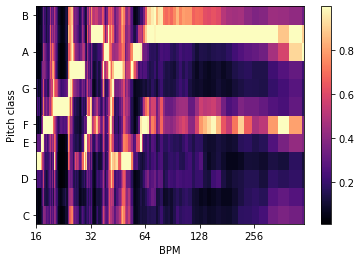

metal


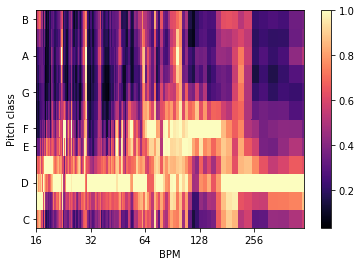

metal


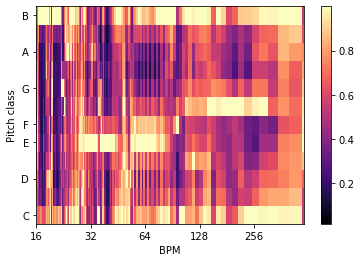

metal


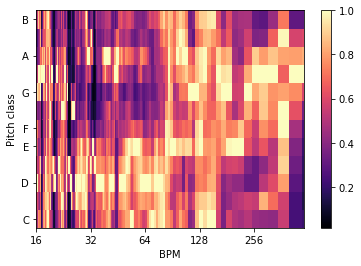

metal


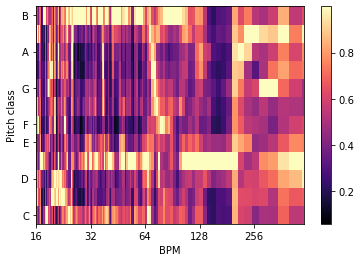

metal


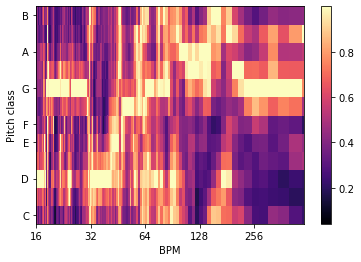

metal


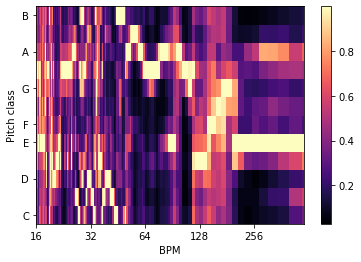

metal


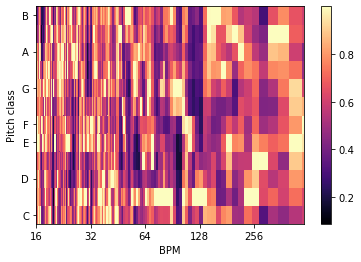

metal


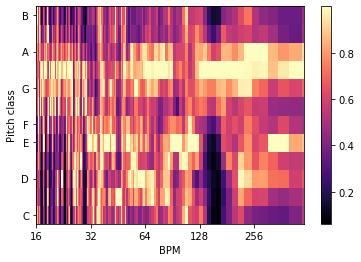

metal


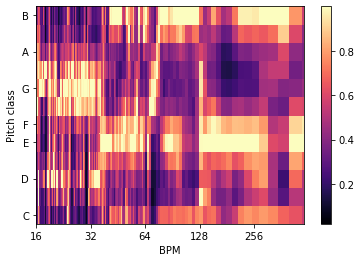

In [33]:
# exibindo chromogramas dos 10 primeiros áudios
for n in range(10):
    exec(f'print(label{n})')
    exec(f'display_chromo(chromo{n}, hop_length)')

In [36]:
# exibindo 3 fiugras para os 3 últimos áudios
for file in files[-4:-1]:
    exec(f'print(label{n})')
    exec(f'display_chromo(chromo{n}, hop_length)')
    exec(f'display_mfccs(chromo{n}, hop_length)')
    exec(f'display_log_scale(chromo{n}, hop_length)')

['mini-genres/jazz/jazz.00004.au',
 'mini-genres/jazz/jazz.00000.au',
 'mini-genres/jazz/jazz.00006.au']